# N Body Problem

In physics the problem of two bodies orbiting one another can be solved neatly, and analytically.
Likewise, approximates can be made for a 3 or 4 body system assuming that the additional bodies
have masses much smaller than the original 2. However, as soon as we deal with the problem of
more than 2 bodies of equivalent mass things become chaotic and require numerical methods to
solve them. This is the N-body problem is physics.<br>

The physics of the N-body problem is governed by the equations of gravity so that for the i
th body of the system the force from the other bodies in a system of N-bodies is

$$Fi=M_i a_i=M_i\frac{d^2r}{dt^2}=\sum_{1,i!=j}^N \frac{G M_i M_j}{{|r_i-r_j|}^2}$$

$$Fix=M_i a_i=M_i\frac{d^2x}{dt^2}=\sum_{1,i!=j}^N \frac{G M_i M_j}{{|r_i-r_j|}^3}(x_i-x_j)\hat{x}$$
$$Fiy=M_i a_i=M_i\frac{d^2y}{dt^2}=\sum_{1,i!=j}^N \frac{G M_i M_j}{{|r_i-r_j|}^3}(y_i-y_j)\hat{y}$$
$$Fiz=M_i a_i=M_i\frac{d^2z}{dt^2}=\sum_{1,i!=j}^N \frac{G M_i M_j}{{|r_i-r_j|}^3}(z_i-z_j)\hat{z}$$

Accelerations of Star1 
$$a_{1x}=\frac{d^2x}{dt^2}=\frac{G M_2}{{|r_{12}-r_{12}|}^3}(x_2-x_1)+\frac{G M_3}{{|r_{13}-r_{13}|}^3}(x_3-x_1)\hat{x}$$<br>
$$a_{1y}=\frac{d^2y}{dt^2}=\frac{G M_2}{{|r_{12}-r_{12}|}^3}(y_2-y_1)+\frac{G M_3}{{|r_{13}-r_{13}|}^3}(y_3-y_1)\hat{x}$$<br>
$$a_{1z}=\frac{d^2z}{dt^2}=\frac{G M_2}{{|r_{12}-r_{12}|}^3}(z_2-z_1)+\frac{G M_3}{{|r_{13}-r_{13}|}^3}(z_3-z_1)\hat{x}$$<br>

Accelerations of star 2
$$a_{2x}=\frac{d^2x}{dt^2}=\frac{G M_1}{{|r_{12}-r_{12}|}^3}(x_1-x_2)+\frac{G M_3}{{|r_{23}-r_{23}|}^3}(x_3-x_2)\hat{x}$$
<br>
$$a_{2y}=\frac{d^2y}{dt^2}=\frac{G M_1}{{|r_{12}-r_{12}|}^3}(y_1-y_2)+\frac{G M_3}{{|r_{23}-r_{23}|}^3}(y_3-y_2)\hat{x}$$
<br>
$$a_{2z}=\frac{d^2z}{dt^2}=\frac{G M_1}{{|r_{12}-r_{12}|}^3}(z_1-z_2)+\frac{G M_3}{{|r_{23}-r_{23}|}^3}(z_3-z_2)\hat{x}$$
<br>

Accelerations of star 3
$$a_{3x}=\frac{d^2x}{dt^2}=\frac{G M_1}{{|r_{13}-r_{13}|}^3}(x_1-x_3)+\frac{G M_2}{{|r_{23}-r_{23}|}^3}(x_2-x_3)\hat{x}$$<br>
$$a_{3y}=\frac{d^2y}{dt^2}=\frac{G M_1}{{|r_{13}-r_{13}|}^3}(y_1-y_3)+\frac{G M_2}{{|r_{23}-r_{23}|}^3}(y_2-y_3)\hat{y}$$<br>
$$a_{3z}=\frac{d^2z}{dt^2}=\frac{G M_1}{{|r_{13}-r_{13}|}^3}(z_1-z_3)+\frac{G M_2}{{|r_{23}-r_{23}|}^3}(z_2-z_3)\hat{z}$$<br>

You have the following system, two stars of equal mass orbit around their common center of mass
a distance of 50 AU apart. <br>
A third star with mass of 1/2 that of the inner two stars orbits the center of mass of the system with a pericenter of 30 AU and a apocenter of 2000 AU. The orbit of the 3rd star is also inclined relative to the plane of the inner two stars by 13 degrees. Starting star 3 at its apocenter, <br>

Do the calculation for a clockwise and counterclockwise rotation for M1 and M2.

<br>

**Start your calculation with 1000 timesteps and then explore what occurs when you increase or decrease the number of timesteps.** 
When number of timesteps N is decreased, velocity and acceleration of orbits are calculated at very few points. Hence, calculated orbits, velocities and accelerations are not accurate. But when N is increased,calculations are accurate to some extent and helpful in order to get a better understanding of the trends in velocities and accelerations with time.<br>

**Do you notice any computational glitches? Do you believe your
answers?**
Yes. Using the RK4 method for calculations will cause sharp points/cusps and drops to occur in velocity and accelerations at points where the stars come closer to one another, which is much smoother in reality. So the velocities and accelerations are not super accurate. Acceleration is calculated only at few points.<br>

For each case make the following plots.<br>
• Magnitude of the velocity and acceleration of the stars as a function of time.<br>
• Orbits of the three stars as a function of time.

Required for the graduate students, option for undergraduates.
• We have initially assumed M3 = 1/2 M

**Run the code assuming M3 = [0.1,1.0,2.0,5.0] $M_{\odot}$**
**What differences do you see?**<br>
As the mass increases, 
- Orbits would be longer
- velocities of M3 would also decrease
- the time taken for star 3 to come near star 1 and star 2 increases.


In [76]:
import numpy as np
import matplotlib.pyplot as plt


In [77]:
#constants
G=4*np.pi*np.pi

#M1=M2=M=1 Solar mass
M=1.0
M1=M
M2=M


#delta(inclination with the z axis)
delta=13*(np.pi/180)

In [78]:
def f(s1,s2,s,t):
    '''Computes the derivative of s at t=0 for star 3'''
    '''Input s1: Initial conditions of star 1        '''
    '''      s2: Initial conditions of star 2        '''
    '''      s : Initial conditions of star 3        '''
    x3=s[0]
    y3=s[1]
    z3=s[2]
    
    
    vx3=s[3]
    vy3=s[4]
    vz3=s[5]
    
    x1=s1[0]
    y1=s1[1]
    z1=s1[3]
    
    x2=s2[0]
    y2=s2[1]
    z2=s2[3]
    
    #Initial distance between star1 and star 2
    r13=np.sqrt((x1-x3)*(x1-x3)+(y1-y3)*(y1-y3)+(z1-z3)*(z1-z3))
    
    #Initial distance between star2 and star3
    r23=np.sqrt((x2-x3)*(x2-x3)+(y2-y3)*(y2-y3)+(z2-z3)*(z2-z3))
    
    #Accelerations
    ax3=(G*M1*(x1-x3)/(r13*r13*r13)) + (G*M2*(x2-x3)/(r23*r23*r23))
    ay3=(G*M1*(y1-y3)/(r13*r13*r13)) + (G*M2*(y2-y3)/(r23*r23*r23))
    az3=(G*M1*(z1-z3)/(r13*r13*r13)) + (G*M2*(z2-z3)/(r23*r23*r23))
   
    return np.array([vx3,vy3,vz3,ax3,ay3,az3],float)


In [79]:
def RK4(s1,s2,s,t):
    '''Solves for r, velocity for star star 3        '''
    
    '''Input s1: Initial conditions of star 1        '''
    '''      s2: Initial conditions of star 2        '''
    '''      s : Initial conditions of star 3        '''
    '''      t : Time array                          '''
    '''Output  : x,y,z,vx,vy,vz                      '''
    
    x=[]
    y=[]
    z=[]
    
    vx=[]
    vy=[]
    vz=[]
    
    h=t[1]-t[0]
    
    for i in t:
        x.append(s[0])
        y.append(s[1])
        z.append(s[2])
        
        vx.append(s[3])
        vy.append(s[4])
        vz.append(s[5])
        
        
        k1=h*f(s1,s2,s,i)
        k2=h*f(s1,s2,s+0.5*k1,i+0.5*h)
        k3=h*f(s1,s2,s+0.5*k2,i+0.5*h)
        k4=h*f(s1,s2,s+k3,i+h)
        s=s+((k1+2*k2+2*k3+k4)/6)
        
    return x,y,z,vx,vy,vz

In [80]:
def f12(s1,s2,s,t,star,M3):
    '''Computes the derivative of r and velocity at t=0 for star 1,2'''
    '''Input s1: Initial conditions of star 1                       '''
    '''      s2: Initial conditions of star 2                       '''
    '''      s : Initial conditions of star 3                       '''
    '''      t : Time array                                         '''
    '''    star: 1 or 2                                             '''
    '''      M3: Mass of star 3                                     '''
    '''Output  : x,y,z,vx,vy,vz                                     '''
    
    x1=s1[0]
    y1=s1[1]
    z1=s1[2]
    
    vx1=s1[3]
    vy1=s1[4]
    vz1=s1[5]
    
    x2=s2[0]
    y2=s2[1]
    z2=s2[2]
    
    vx2=s2[3]
    vy2=s2[4]
    vz2=s2[5]
    
    x3=s[0]
    y3=s[1]
    z3=s[2]
    r10=25
    r20=r10
    r30=2000
    r12=50
    

    if(star==1):
        vx=vx1
        vy=vy1
        vz=vz1
        #distance between star 1 and star 3
        r13=np.sqrt((x3-x1)*(x3-x1)+(y3-y1)*(y3-y1)+(z3-z1))
        
        #accelerations of star 1
        ax=(G*M2*(x2-x1)/(r12*r12*r12))+(G*M3*(x3-x1)/(r13*r13*r13))
        ay=(G*M2*(y2-y1)/(r12*r12*r12))+(G*M3*(y3-y1)/(r13*r13*r13))
        az=(G*M2*(z2-z1)/(r12*r12*r12))+(G*M3*(z3-z1)/(r13*r13*r13))
        
    else:
        vx=vx2
        vy=vy2
        vz=vz2
        r23=np.sqrt((x3-x2)*(x3-x2)+(y3-y2)*(y3-y1)+(z3-z2))
        #accelerations of star 2
        ax=(G*M1*(x1-x2)/(r12*r12*r12))+(G*M3*(x3-x2)/(r23*r23*r23))
        ay=(G*M1*(y1-y2)/(r12*r12*r12))+(G*M3*(y3-y2)/(r23*r23*r23))
        az=(G*M1*(z1-z2)/(r12*r12*r12))+(G*M3*(z3-z2)/(r23*r23*r23))
    return np.array([vx,vy,vz,ax,ay,az],float)

def RK412(s1,s2,s,t,star,M3):
    '''Solves for x,y,z velocity for star star 1,2   '''
    
    '''Input s1: Initial conditions of star 1        '''
    '''      s2: Initial conditions of star 2        '''
    '''      s : Initial conditions of star 3        '''
    '''      t : Time array                          '''
    
    '''Output  : x,y,z,vx,vy,vz                      '''
    
    x=[]
    y=[]
    z=[]
    
    vx=[]
    vy=[]
    vz=[]
    h=t[1]-t[0]
   
    for i in t:
        if(star==1):
            x.append(s1[0])
            y.append(s1[1])
            z.append(s1[2])

            vx.append(s1[3])
            vy.append(s1[4])
            vz.append(s1[5])
            
            k1=h*f12(s1,s2,s,i,1,M3)
            k2=h*f12(s1+0.5*k1,s2,s,i+0.5*h,1,M3)
            k3=h*f12(s1+0.5*k2,s2,s,i+0.5*h,1,M3)
            k4=h*f12(s1+k3,s2,s,i+h,1,M3)
            s1=s1+((k1+2*k2+2*k3+k4)/6)
            
        elif(star==2):
            x.append(s2[0])
            y.append(s2[1])
            z.append(s2[2])

            vx.append(s2[3])
            vy.append(s2[4])
            vz.append(s2[5])
            
            k1=h*f12(s1,s2,s,i,2,M3)
            k2=h*f12(s1,s2+0.5*k1,s,i+0.5*h,2,M3)
            k3=h*f12(s1,s2+0.5*k2,s,i+0.5*h,2,M3)
            k4=h*f12(s1,s2+k3,s,i+h,2,M3)
            s2=s2+((k1+2*k2+2*k3+k4)/6)
    return x,y,z,vx,vy,vz

In [81]:
##############################INITIAL CONDITIONS#########################################
#star 1----------------------------------------------------------------------------------
#Initial x,y,z
x10=0
y10=-25
z10=0

r10=25
#initial velocity
v10x=np.sqrt(G*M2**2/((2*r10)*(M1+M2)))
v10y=0
v10z=0

#anticlockwise initial conditions
s1_ac=np.array([x10,y10,z10,v10x,v10y,v10z])

#clockwise initial conditions
s1_c=np.array([x10,y10,z10,-v10x,v10y,v10z])

#star2-----------------------------------------------------------------------------------
#initial x,y,z
x20=0
y20=25
z20=0

r20=25
#initial velocity
v20x=-np.sqrt(G*M1**2/((2*r10)*(M1+M2)))
v20y=0
v20z=0

#anticlockwise initial conditions
s2_ac=np.array([x20,y20,z20,v20x,v20y,v20z])

s2_c=np.array([x20,y20,z20,-v20x,v20y,v20z])


#star3----------------------------------------------------------------------------------
r0=2000
#initial x,y,z
x30=-2000*np.cos(delta)
y30=-2000*np.sin(delta)
z30=0

#Initial velocity
a=2030/2
v0=np.sqrt(G*(M1+M2)*((2/r0)-(1/a)))
v30x=0
v30y=v0*np.cos((np.pi/2)-delta)
v30z=-v0*np.sin((np.pi/2)-delta)

#array s with initial values
#anti clockwise direction
s_ac=np.array([x30,y30,z30,v30x,v30y,v30z])

#clockwise direction
s_c=np.array([x30,y30,z30,v30x,-v30y,-v30z])
########################################################################################

In [82]:
def calculate(N1,m3,clockwise):
    '''Calculates positions,velocities,accelerations for stars 1,2,3 and produce plots             '''
    '''Input : N=no of timesteps, m3=Mass of star 3, clockwise=0 or 1 (0 for anticlockwise)        '''
    '''Output: 4 Figures: Orbits, Velocities, Accelerations, Magnitude of velocity and acceleration'''
    
    #For star 3
    M3=m3
    #semi-major axis
    a=2030/2

    #epicenter
    b=np.sqrt(2000*30)

    #period of star 3
    p=2*np.pi*np.sqrt((a*a*a)/(G*(M1+M2+M3)))#timesteps
    N=N1

    #time star 3
    t=np.linspace(0,p,N)


    #########calculation of x,v,z#################################################################
    if(clockwise==0):
        s1=s1_ac
        s2=s2_ac
        s=s_ac
    elif(clockwise==1):
        s1=s1_c
        s2=s2_c
        s=s_c
        
    #star1----------------------------------------------------------------------------------------
    #positions and velocities for star 1
    x1,y1,z1,v1x,v1y,v1z=np.array(RK412(s1,s2,s,t,1,M3))
    v1x=np.abs(v1x)
    v1y=np.abs(v1y)
    v1z=np.abs(v1z)
    #Magnitude of velocity
    v1=np.sqrt(v1x*v1x+v1y*v1y+v1z*v1z)
 
    #star2---------------------------------------------------------------------------------------

    #positions and velocities for star 2
    x2,y2,z2,v2x,v2y,v2z=np.array(RK412(s1_ac,s2_ac,s_ac,t,2,M3))
    v2x=np.abs(v2x)
    v2y=np.abs(v2y)
    v2z=np.abs(v2z)
    #Magnitude of velocity
    v2=np.sqrt(v2x*v2x+v2y*v2y+v2z*v2z)
    
    #star3---------------------------------------------------------------------------------------
    #positions and velocities for star 3
    
    if(M3!=0):
        x3,y3,z3,v3x,v3y,v3z=np.array(RK4(s1,s2,s,t))
        v3x=np.abs(v3x)
        v3y=np.abs(v3y)
        v3z=np.abs(v3z)

    
    #Magnitude of velocity
    v3=np.sqrt(v3x*v3x+v3y*v3y+v3z*v3z)
    #--------------------------------------------------------------------------------------------
    
    #********************************************************************************************
    #Accelerations of star 1
    r12=np.sqrt((x2-x1)*(x2-x1)+(y2-y1)*(y2-y1)+(z2-z1))
    r13=np.sqrt((x1-x3)*(x1-x3)+(y1-y3)*(y1-y3)+(z1-z3)*(z1-z3))
    
    a1x=np.abs(G*M2*(x2-x1)/(r12*r12*r12))+(G*M3*(x3-x1)/(r13*r13*r13))
    a1y=np.abs(G*M2*(y2-y1)/(r12*r12*r12))+(G*M3*(y3-y1)/(r13*r13*r13))
    a1z=np.abs(G*M2*(z2-z1)/(r12*r12*r12))+(G*M3*(z3-z1)/(r13*r13*r13))
    
    a1=np.sqrt(a1x*a1x+a1y*a1y+a1z*a1z)
    
    #Accelerations of star 2
    r23=np.sqrt((x3-x2)*(x3-x2)+(y3-y2)*(y3-y1)+(z3-z2))
    
    a2x=np.abs((G*M1*(x1-x2)/(r12*r12*r12))+(G*M3*(x3-x2)/(r23*r23*r23)))
    a2y=np.abs((G*M1*(y1-y2)/(r12*r12*r12))+(G*M3*(y3-y2)/(r23*r23*r23)))
    a2z=np.abs((G*M1*(z1-z2)/(r12*r12*r12))+(G*M3*(z3-z2)/(r23*r23*r23)))
    
    a2=np.sqrt(a2x*a2x+a2y*a2y+a2z*a2z)
    
        
    #Acceleration of star 3
    a3x=np.abs((G*M1*(x1-x3)/(r13*r13*r13)) + (G*M2*(x2-x3)/(r23*r23*r23)))
    a3y=np.abs((G*M1*(y1-y3)/(r13*r13*r13)) + (G*M2*(y2-y3)/(r23*r23*r23)))
    a3z=np.abs((G*M1*(z1-z3)/(r13*r13*r13)) + (G*M2*(z2-z3)/(r23*r23*r23)))
    
    a3=np.sqrt(a3x*a3x+a3y*a3y+a3z*a3z)
    
    
    ########plots#################################################################################
    #Orbits---------------------------------------------------------------------------------------
    fig=plt.figure(figsize=(20,5))
    if(clockwise==1):
        c='Clockwise'
    else:
        c='Anti-clockwise'
        
    fig.suptitle('N={}, M3={}, {}'.format(N1,m3,c),fontsize=20)
    legend=['Star 1','Star 2','Star 3']

    ax=fig.add_subplot(131)
    ax.scatter(x1,y1,c='r',marker='o',s=2)
    ax.scatter(x2,y2,c='b',marker='o',s=2)
    if(M3!=0):
        ax.scatter(x3,y3,c='g',marker='o',s=2)
    ax.legend(legend)
    ax.set_title('x vs y',size=15)
    ax.set_xlabel('x [AU]',size=14)
    ax.set_ylabel('y [AU]',size=14)


    ax1=fig.add_subplot(132)
    ax1.scatter(y1,z1,c='r',marker='o',s=2)
    ax1.scatter(y2,z2,c='b',marker='o',s=2)
    if(M3!=0):
        ax1.scatter(y3,z3,c='g',marker='o',s=2)
    ax1.set_title('y vs z',size=15)
    ax1.set_xlabel('y [AU]',size=14)
    ax1.set_ylabel('Z [AU]',size=14)
    ax1.legend(legend)

    ax2=fig.add_subplot(133)
    ax2.scatter(x1,z1,c='r',marker='o',s=2)
    ax2.scatter(x2,z2,c='b',marker='o',s=2)
    if(M3!=0):
        ax2.scatter(x3,z3,c='g',marker='o',s=2)
    ax2.legend(legend)
    ax2.set_title('x vs z',size=15)
    ax2.set_xlabel('x [AU]',size=14)
    ax2.set_ylabel('z [AU]',size=14)

    #Velocities-----------------------------------------------------------------------------------
    fig1=plt.figure(figsize=(20,5))
    ax3=fig1.add_subplot(131)
    fig1.suptitle('N={}, M3={}, {}'.format(N1,m3,c),fontsize=20)

    ax3.scatter(t,v1x,c='r',marker='o',s=5)
    ax3.scatter(t,v2x,c='b',marker='o',s=5)
    if(M3!=0):
        ax3.scatter(t,v3x,c='g',marker='o',s=5)
    ax3.legend(legend)
    ax3.set_title('$v_x$ vs t',fontsize=15)
    ax3.set_xlabel('t [yr]',fontsize=14)
    ax3.set_ylabel('$v_x$ [AU $yr^{-1}$]',fontsize=14)


    ax4=fig1.add_subplot(132)
    ax4.scatter(t,v1y,c='r',marker='o',s=5)
    ax4.scatter(t,v2y,c='b',marker='o',s=5)
    if(M3!=0):
        ax4.scatter(t,v3y,c='g',marker='o',s=5)
    ax4.set_title('$v_y$ vs t',fontsize=15)
    ax4.set_xlabel('t [yr]',fontsize=14)
    ax4.set_ylabel('$v_y$ [AU $yr^{-1}$]',fontsize=14)
    ax4.legend(legend)

    ax5=fig1.add_subplot(133)
    ax5.scatter(t,v1z,c='r',marker='o',s=5)
    ax5.scatter(t,v2z,c='b',marker='o',s=5)
    if(M3!=0):
        ax5.scatter(t,v3z,c='g',marker='o',s=5)
    ax5.legend(legend)
    ax5.set_title('$v_z$ vs t',fontsize=15)
    ax5.set_xlabel('t [yr]',fontsize=14)
    ax5.set_ylabel('$v_z$ [AU $yr^{-1}$]',fontsize=14)
    
    #Accelerations----------------------------------------------------------------------------------
    fig2=plt.figure(figsize=(20,5))
    fig2.suptitle('N={}, M3={}, {}'.format(N1,m3,c),fontsize=20)
    ax6=fig2.add_subplot(131)

    ax6.scatter(t,a1x,c='r',marker='o',s=5)
    ax6.scatter(t,a2x,c='b',marker='o',s=5)
    if(M3!=0):
        ax6.scatter(t,a3x,c='g',marker='o',s=5)
    ax6.legend(legend)
    ax6.set_title('$a_x$ vs t',fontsize=15)
    ax6.set_xlabel('t [yr]',fontsize=14)
    ax6.set_ylabel('$a_x$ [AU $yr^{-2}$]',fontsize=14)


    ax7=fig2.add_subplot(132)
    ax7.scatter(t,a1y,c='r',marker='o',s=5)
    ax7.scatter(t,a2y,c='b',marker='o',s=5)
    if(M3!=0):
        ax7.scatter(t,a3y,c='g',marker='o',s=5)
    ax7.set_title('$a_y$ vs t',fontsize=15)
    ax7.set_xlabel('t [yr]',fontsize=14)
    ax7.set_ylabel('$a_y$ [AU $yr^{-2}$]',fontsize=14)
    ax7.legend(legend)

    ax8=fig2.add_subplot(133)
    ax8.scatter(t,a1z,c='r',marker='o',s=5)
    ax8.scatter(t,a2z,c='b',marker='o',s=5)
    if(M3!=0):
        ax8.scatter(t,a3z,c='g',marker='o',s=5)
    ax8.legend(legend)
    ax8.set_title('$a_z$ vs t',fontsize=15)
    ax8.set_xlabel('t [yr]',fontsize=14)
    ax8.set_ylabel('$a_z$ [AU $yr^{-2}$]',fontsize=14)

    #Plot magnitudes of velocity and acceleration----------------------------------------------------
    fig3=plt.figure(figsize=(20,5))
    ax9=fig3.add_subplot(121)
    fig1.suptitle('N={}, M3={}, {}'.format(N1,m3,c),fontsize=20)

    #ax9.plot(t,v1,'r-')
    ax9.scatter(t,v1,c='r',marker='o',s=20)
    #ax9.plot(t,v2,'b-')
    ax9.scatter(t,v2,c='b',marker='o',s=20)
    if(M3!=0):
        #ax9.plot(t,v3,'g-')
        ax9.scatter(t,v3,c='g',marker='o',s=20)
    ax9.legend(legend)
    ax9.set_title('$v $ vs t',fontsize=15)
    ax9.set_xlabel('t [yr]',fontsize=14)
    ax9.set_ylabel('v [AU $yr^{-1}$]',fontsize=14)


    ax10=fig3.add_subplot(122)
    fig3.suptitle('N={}, M3={}, {}'.format(N1,m3,c),fontsize=20)
    #ax10.plot(t,a1,'r-')
    ax10.scatter(t,a1,c='r',marker='o',s=20)
    #ax10.plot(t,a2,'b-')
    ax10.scatter(t,a1,c='b',marker='o',s=20)
    if(M3!=0):
        #ax10.plot(t,a3,'g-')
        ax10.scatter(t,a3,c='g',marker='o',s=20)
    ax10.set_title('$a$ vs t',fontsize=15)
    ax10.set_xlabel('t [yr]',fontsize=14)
    ax10.set_ylabel('$a$ [AU $yr^{-2}$]',fontsize=14)
    ax10.legend(legend)

    
    plt.show()
    return fig,fig1,fig2,fig3

C:\Users\Sachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in sqrt


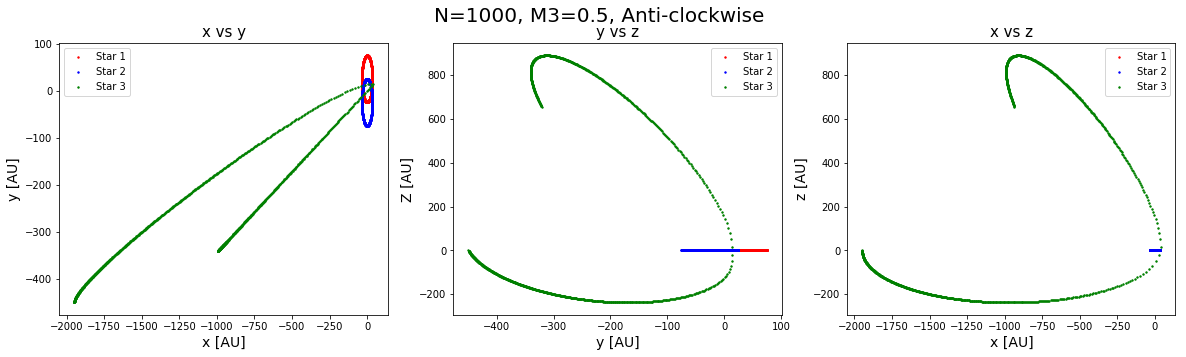

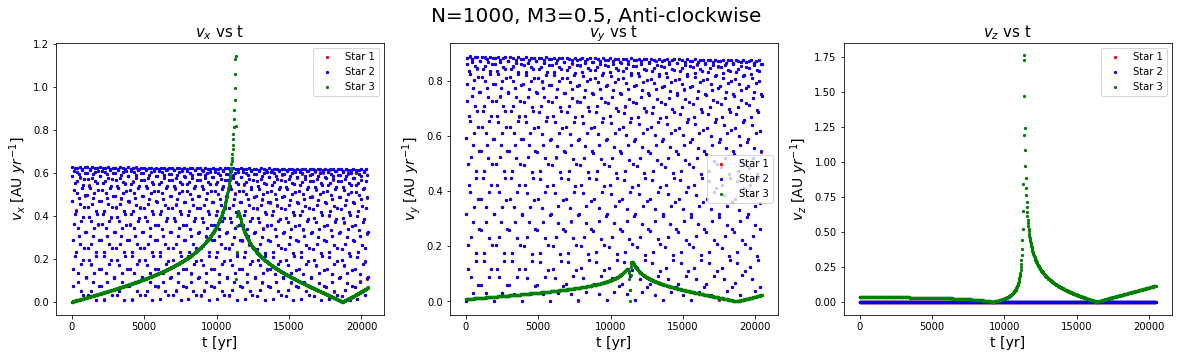

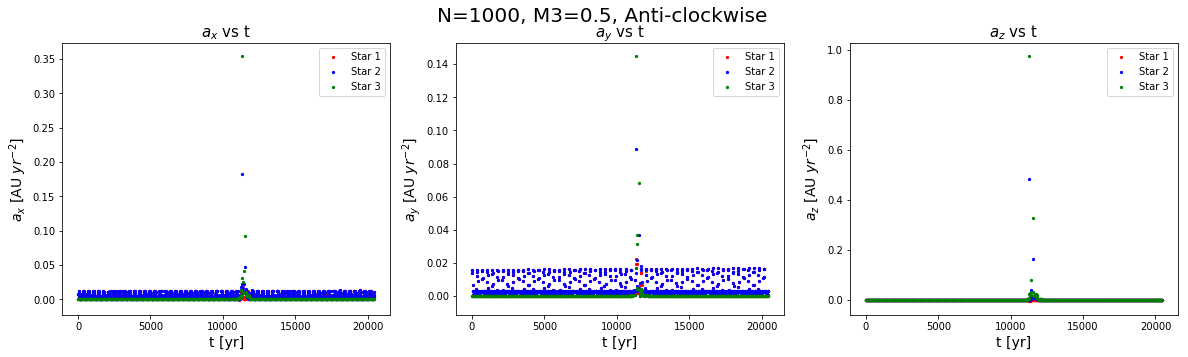

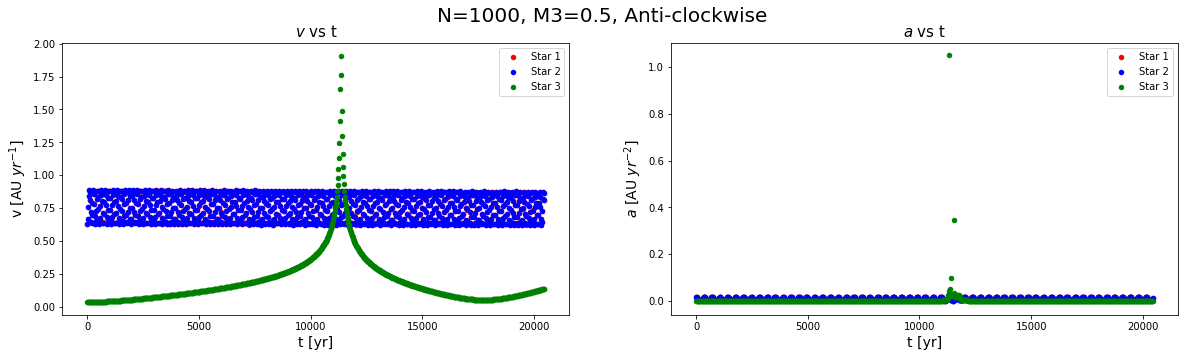

In [83]:
fig,fig2,fig3,fig3p=calculate(1000,0.5,0)
fig.savefig('xyz_1000_0.5_ac.pdf')
fig2.savefig('v_1000_0.5_ac.pdf')
fig3.savefig('a_1000_0.5_ac.pdf')
fig3p.savefig('va_1000_0.5_ac.pdf')

C:\Users\Sachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:52: RuntimeWarning: invalid value encountered in sqrt
C:\Users\Sachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in sqrt


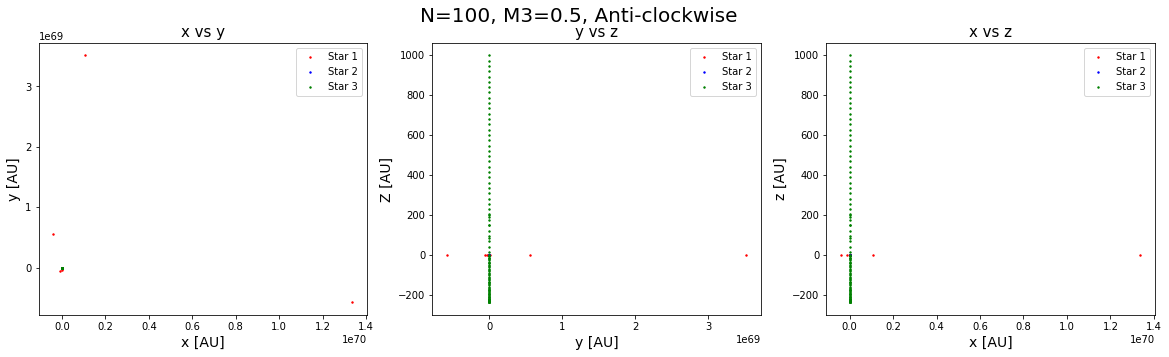

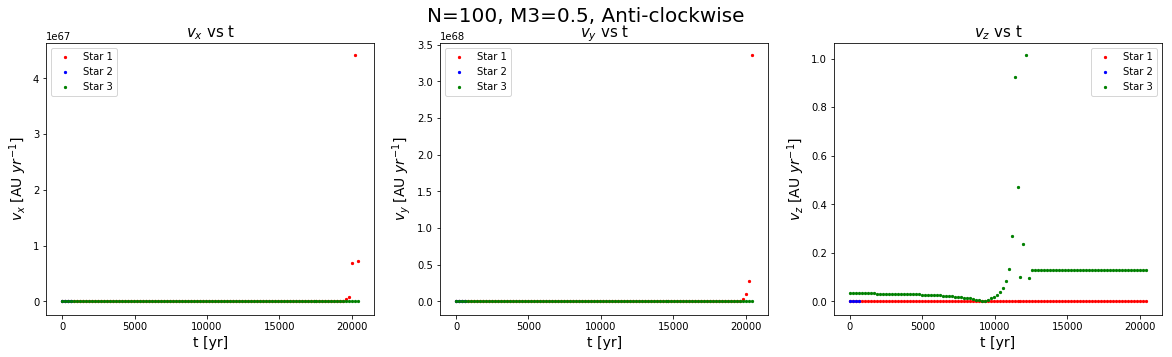

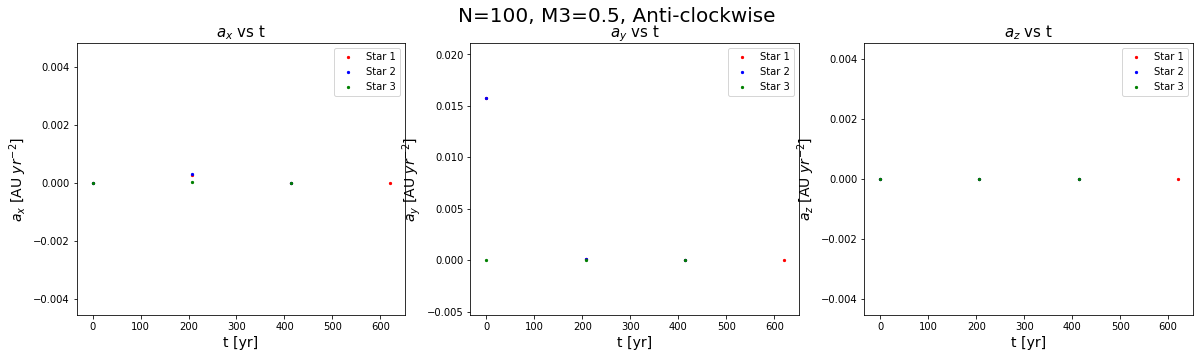

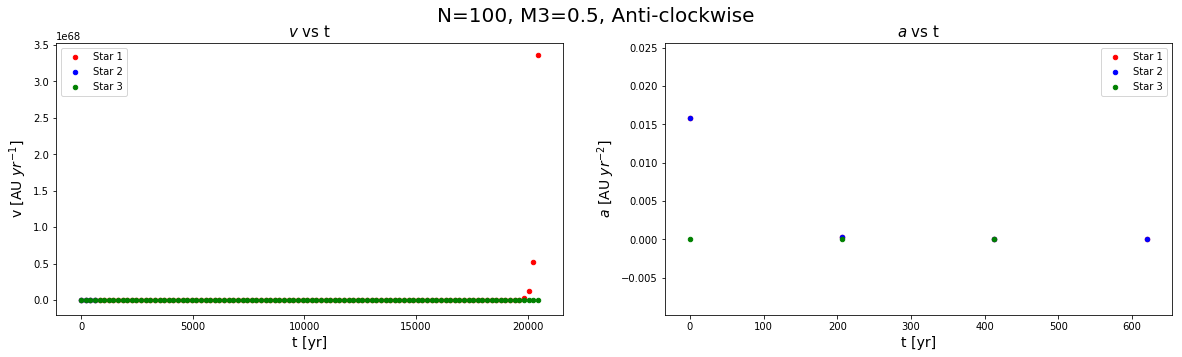

In [84]:
fig3,fig4,fig5,fig5p=calculate(100,0.5,0)
fig3.savefig('xyz_100_1_ac.pdf')
fig4.savefig('v_100_1_ac.pdf')
fig5.savefig('a_100_1_ac.pdf')
fig5p.savefig('va_100_1_ac.pdf')

C:\Users\Sachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in sqrt


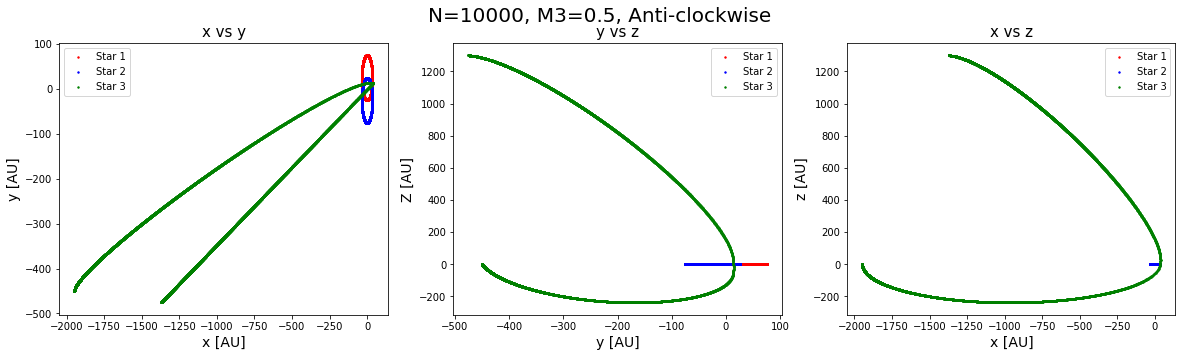

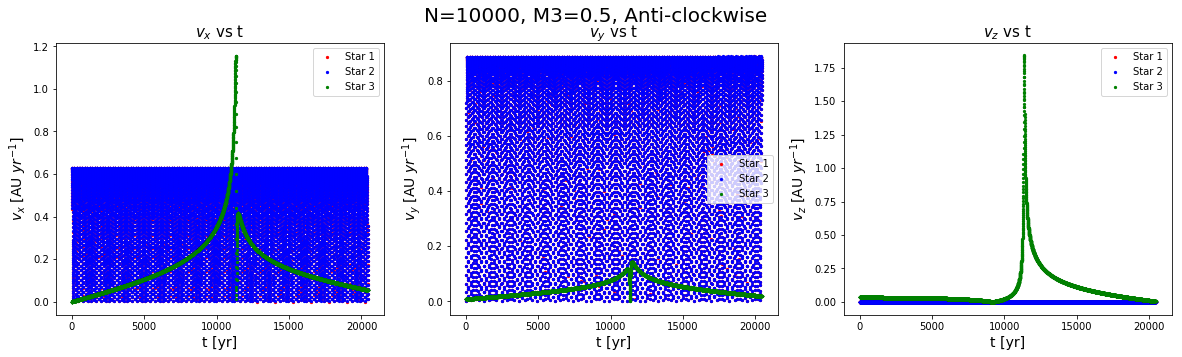

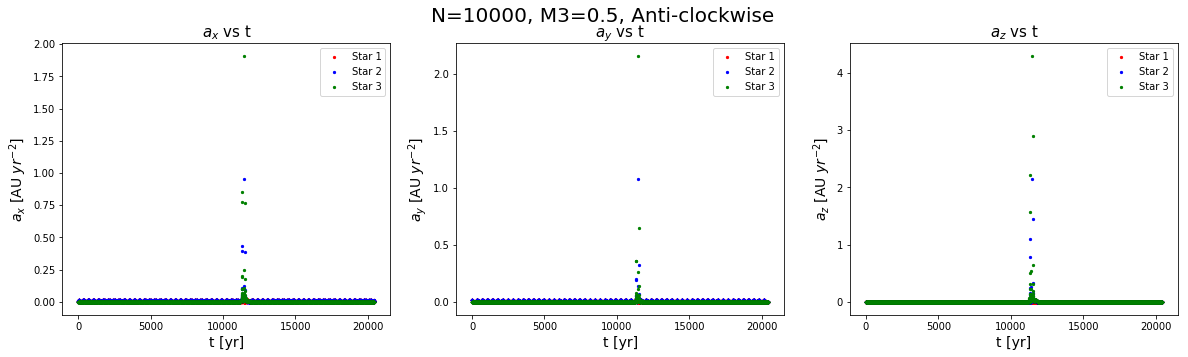

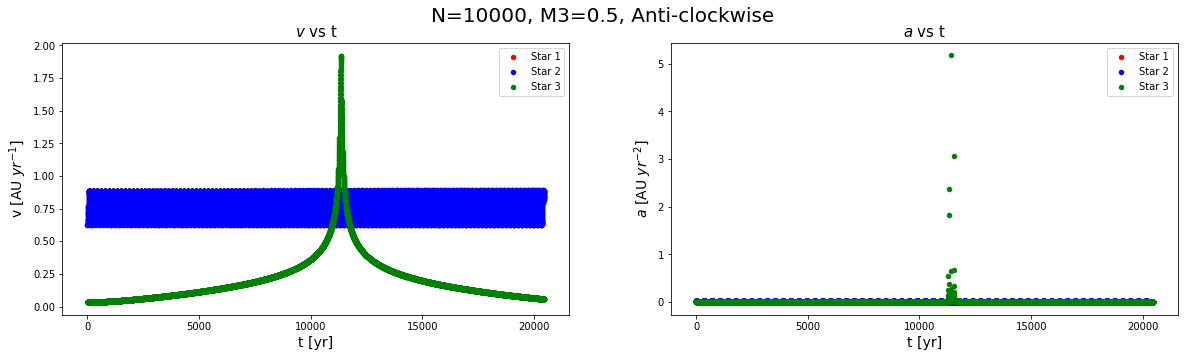

In [85]:
fig5,fig6,fig7,fig7p=calculate(10000,0.5,0)
fig5.savefig('xyz_10000_0.5_ac.pdf')
fig6.savefig('v_10000_0.5_ac.pdf')
fig7.savefig('a_10000_0.5_ac.pdf')
fig7p.savefig('va_10000_0.5_ac.pdf')

C:\Users\Sachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in sqrt


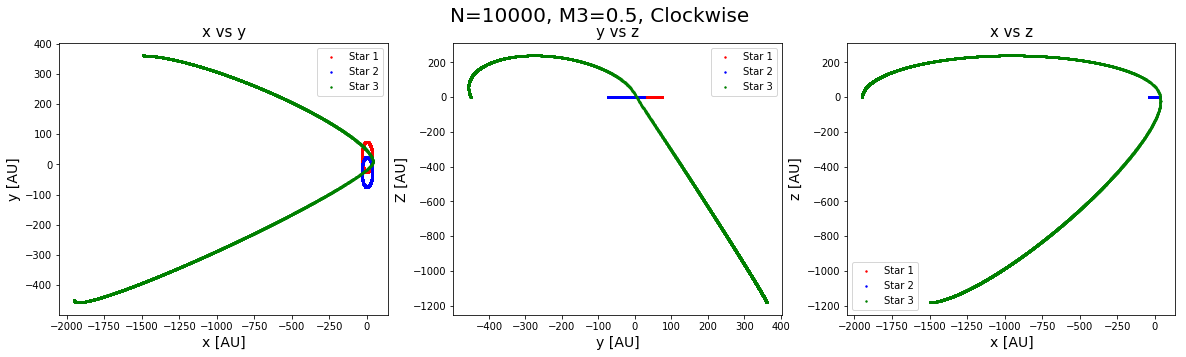

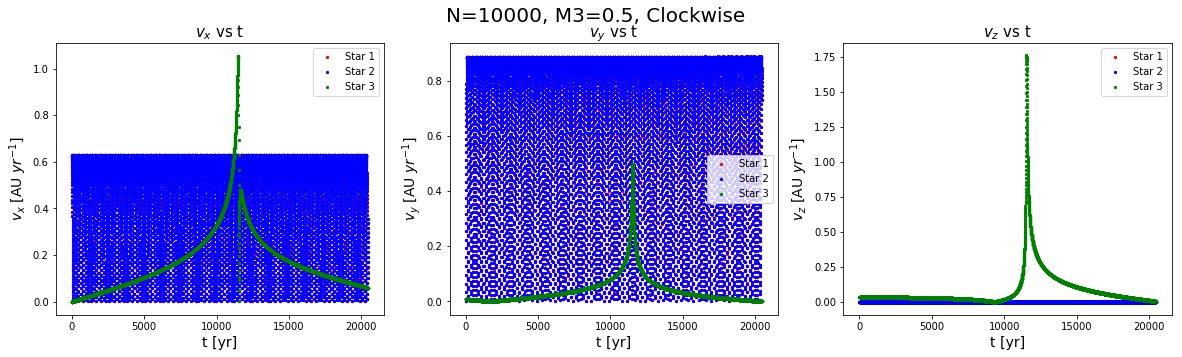

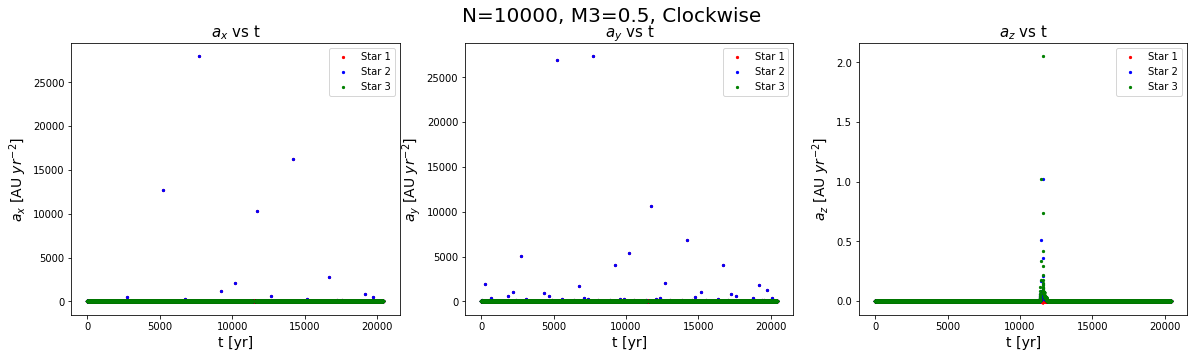

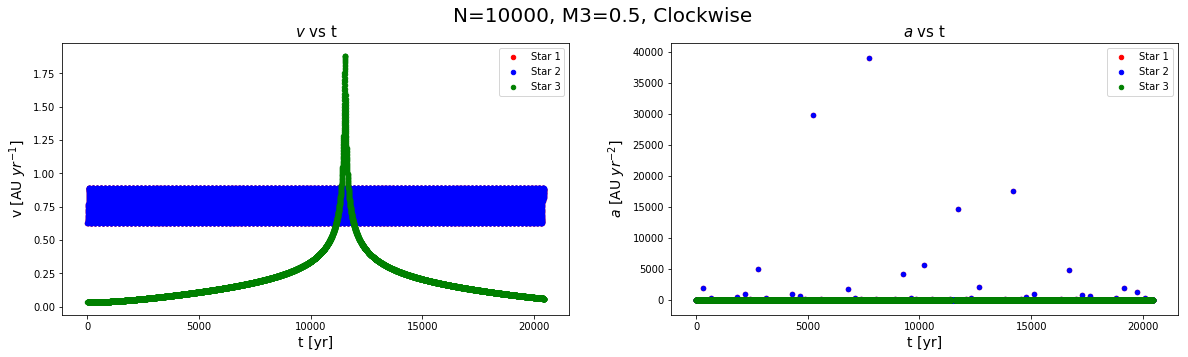

In [86]:
fig8,fig9,fig10,fig10p=calculate(10000,0.5,1)
fig8.savefig('xyz_10000_0.5_c.pdf')
fig9.savefig('v_10000_0.5_c.pdf')
fig10.savefig('a_10000_0.5_c.pdf')
fig10p.savefig('va_10000_0.5_c.pdf')

C:\Users\Sachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in sqrt


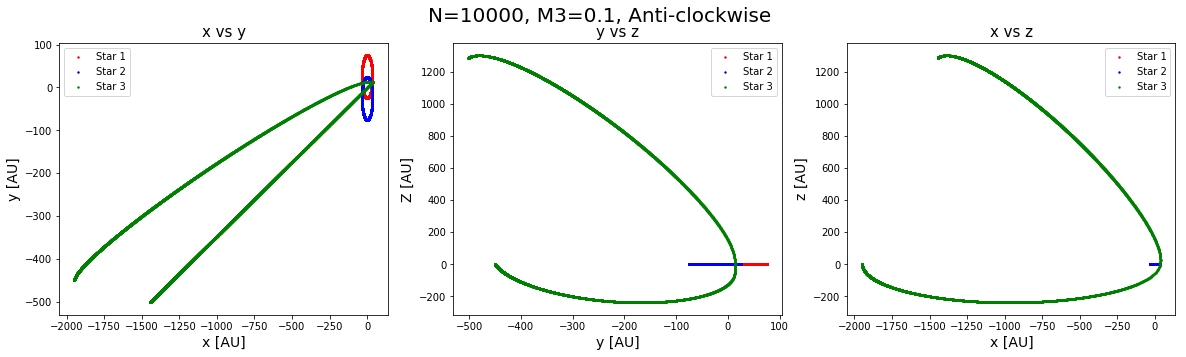

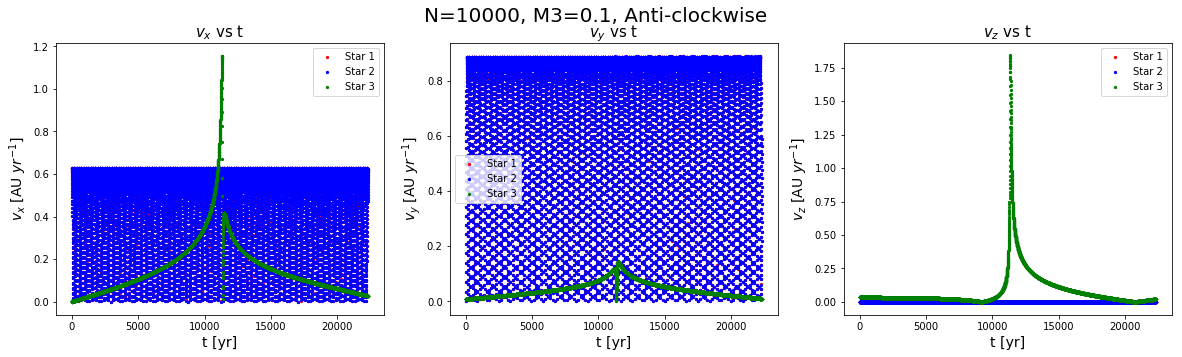

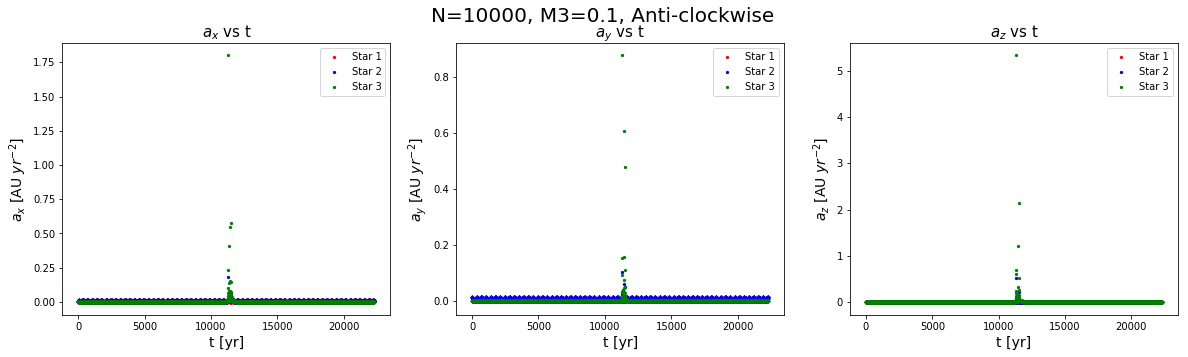

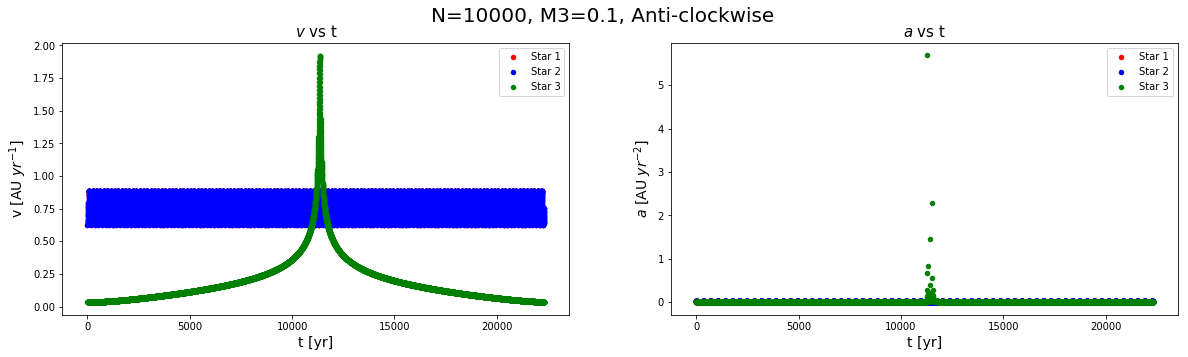

In [87]:
fig11,fig12,fig13,fig13p=calculate(10000,0.1,0)
fig11.savefig('xyz_10000_0.1_ac.pdf')
fig12.savefig('v_10000_0.1_ac.pdf')
fig13.savefig('a_10000_0.1_ac.pdf')
fig13p.savefig('va_10000_0.1_ac.pdf')

C:\Users\Sachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in sqrt


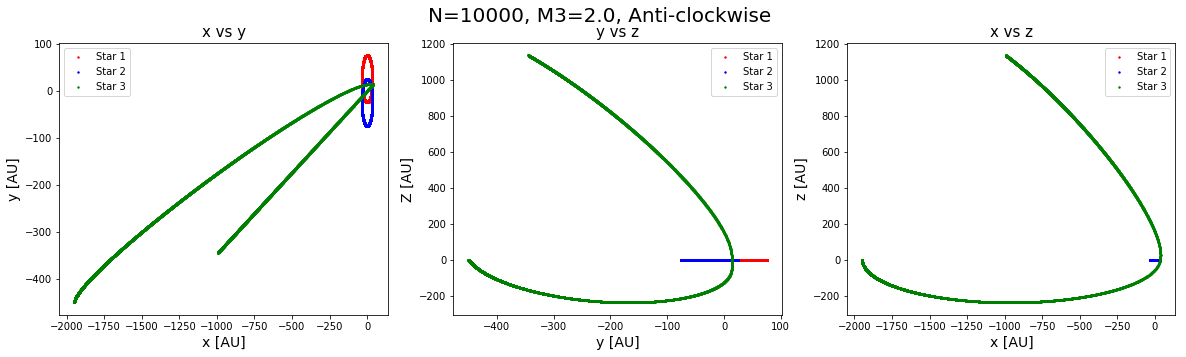

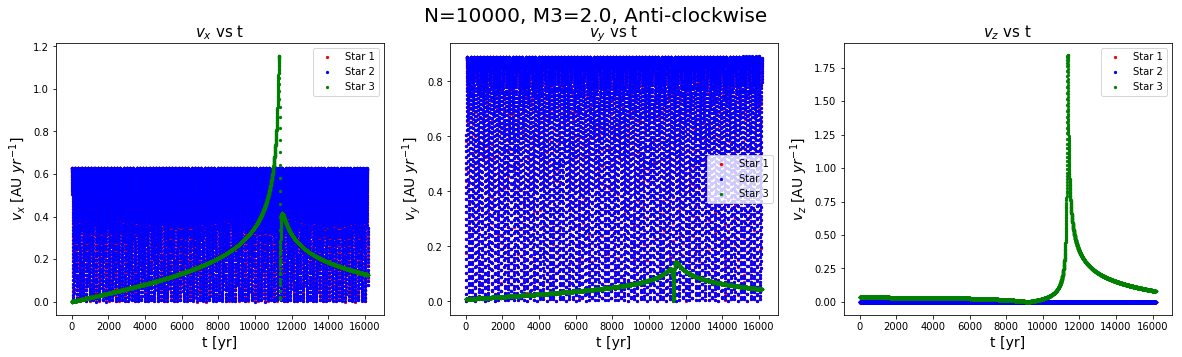

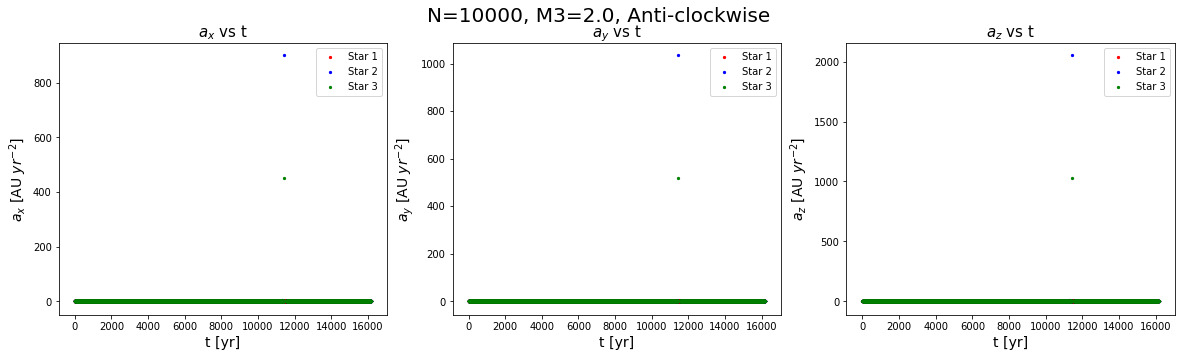

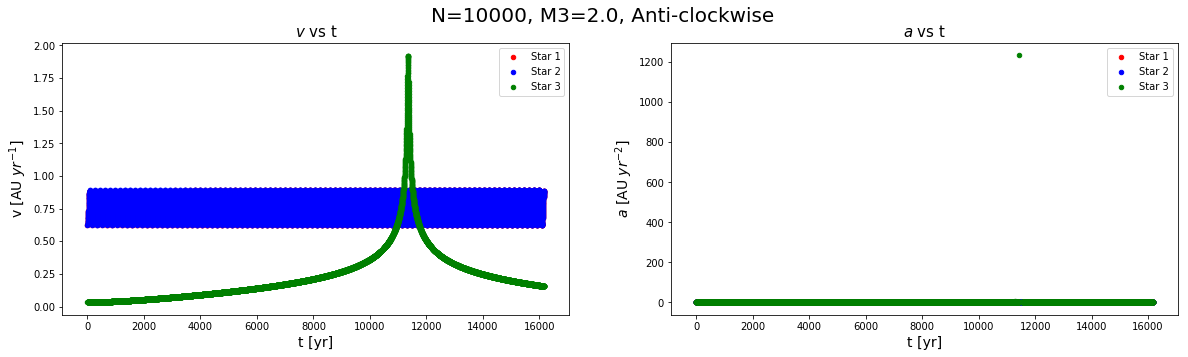

In [88]:
fig14,fig15,fig16,fig16p=calculate(10000,2.0,0)
fig14.savefig('xyz_10000_2_ac.pdf')
fig15.savefig('v_10000_2_ac.pdf')
fig16.savefig('a_10000_2_ac.pdf')
fig16.savefig('va_10000_2_ac.pdf')

C:\Users\Sachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in sqrt


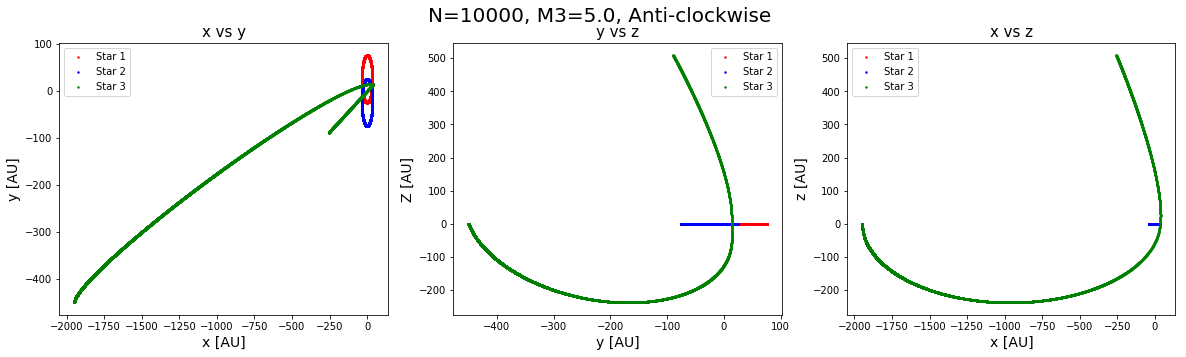

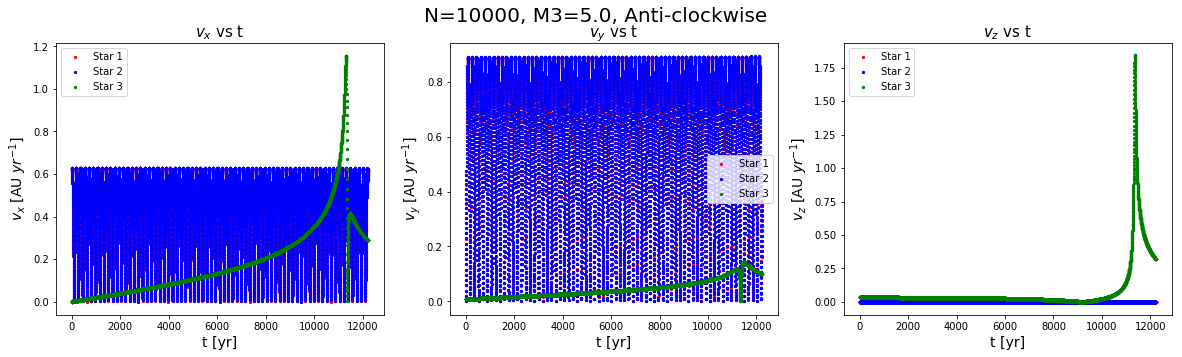

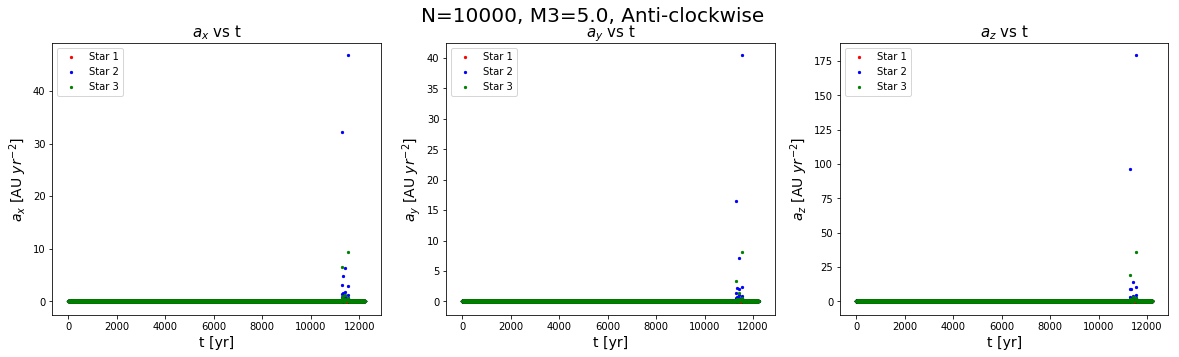

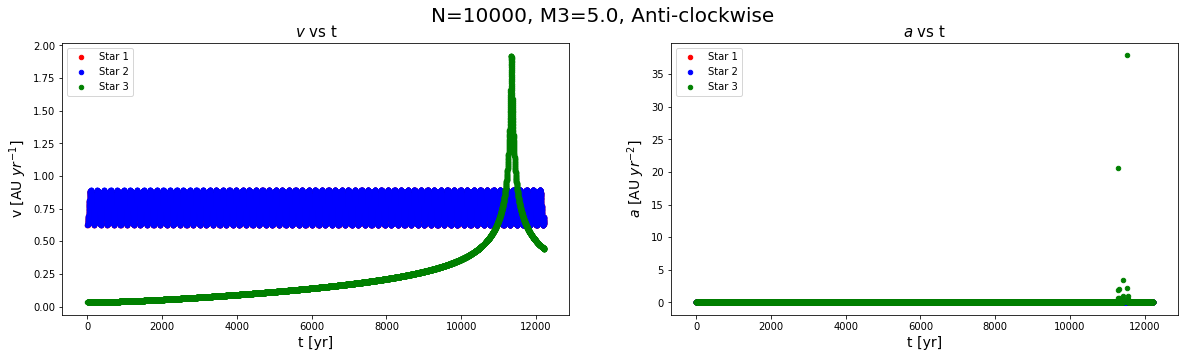

In [89]:
fig17,fig18,fig19,fig19p=calculate(10000,5.0,0)
fig17.savefig('xyz_10000_5_ac.pdf')
fig18.savefig('v_10000_5_ac.pdf')
fig19.savefig('a_10000_5_ac.pdf')
fig19p.savefig('va_10000_5_ac.pdf')

C:\Users\Sachi\Anaconda3\lib\site-packages\ipykernel_launcher.py:77: RuntimeWarning: invalid value encountered in sqrt


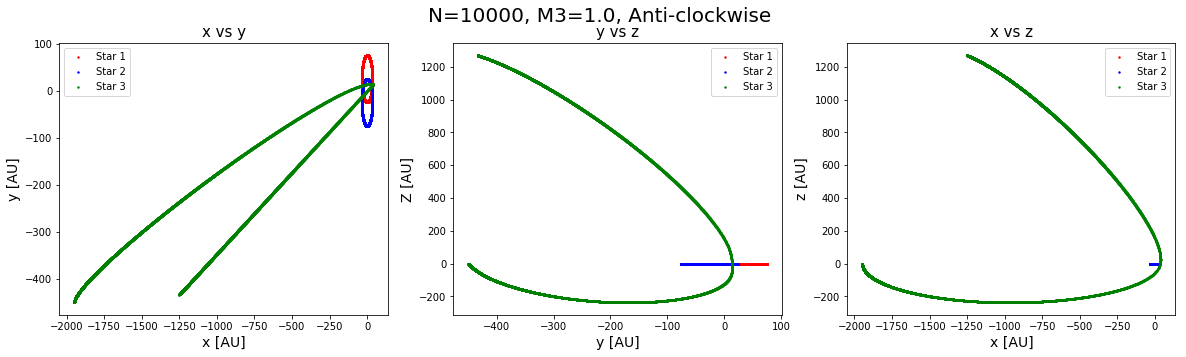

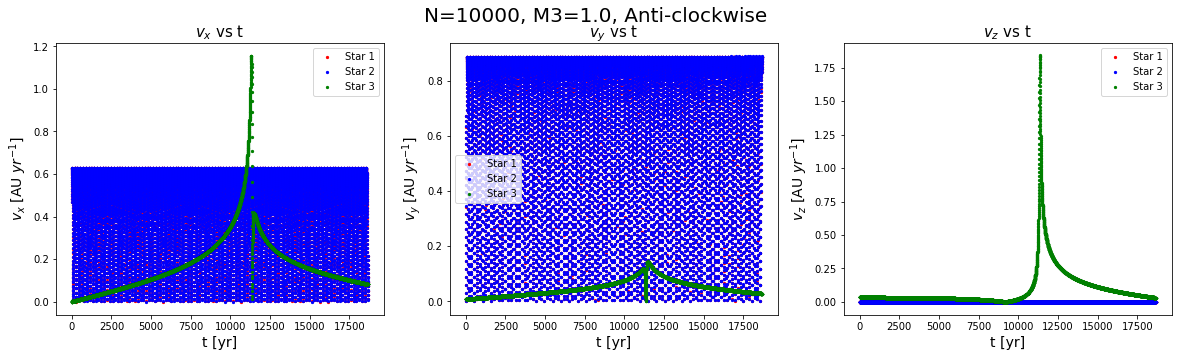

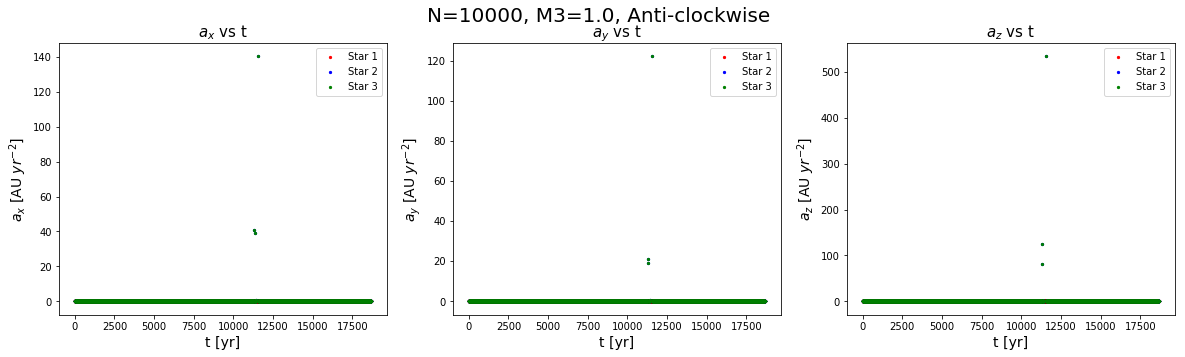

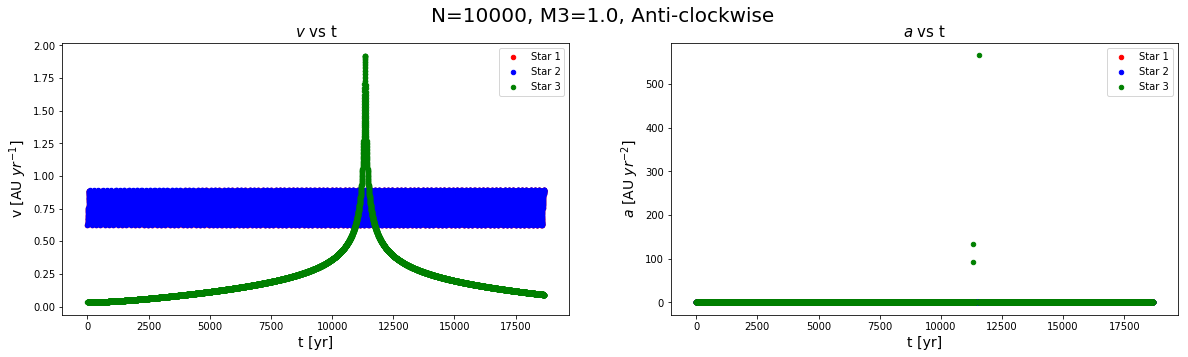

In [90]:
fig20,fig21,fig22,fig23=calculate(10000,1.0,0)
fig20.savefig('xyz_10000_1_ac.pdf')
fig21.savefig('v_10000_1_ac.pdf')
fig22.savefig('a_10000_1_ac.pdf')
fig23.savefig('va_10000_1_ac.pdf')